# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Lailatus Sya'diah]
- **Email:** [lalilatussakdiyah3@gmail.com]
- **ID Dicoding:** [lailatus22s]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
    Analisis: Kita bisa menganalisis variabel cuaca (weathersit, temp, hum, windspeed) dan membandingkannya dengan jumlah penyewaan sepeda (cnt) untuk melihat bagaimana kondisi cuaca memengaruhi pola penggunaan sepeda. Misalnya, apakah penyewaan sepeda lebih tinggi saat cuaca cerah dibandingkan ketika hujan atau angin kencang?

- Pertanyaan 2 : Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan/hari libur?
    Analisis: Dengan memanfaatkan variabel weekday, workingday, dan holiday, kita dapat membandingkan jumlah penyewaan sepeda pada hari kerja (workingday = 1) dengan akhir pekan atau hari libur (workingday = 0) untuk mengetahui apakah perilaku pengguna sepeda berubah tergantung pada hari.

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
data_day = pd.read_csv("day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kode tersebut membaca file **"day.csv"** yang berisi data penyewaan sepeda harian dan menampilkan lima baris      pertama dari dataset tersebut. Dengan melihat lima baris pertama, kita bisa mendapatkan gambaran awal tentang struktur data seperti kolom-kolom yang ada, misalnya tanggal, musim, suhu, kelembaban, dan jumlah penyewaan sepeda. Kita juga bisa melihat tipe data dari masing-masing kolom, apakah itu numerik atau kategorikal, dan mendapatkan pemahaman tentang bagaimana data ini tersusun.

- Selain itu, dengan memeriksa beberapa baris pertama, kita dapat menilai apakah data terlihat bersih atau terdapat potensi masalah seperti nilai kosong atau tidak valid. Secara keseluruhan, langkah ini membantu memberikan pemahaman awal tentang bentuk dan isi dataset sebelum masuk ke tahap analisis lebih mendalam.

In [4]:
data_hour = pd.read_csv("hour.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- Kode tersebut membaca file **"hour.csv"**, yang berisi data penyewaan sepeda per jam, lalu menampilkan lima baris pertama dari dataset tersebut. Dari tampilan awal ini, kita bisa langsung melihat bagaimana data penyewaan sepeda dicatat setiap jamnya, termasuk kolom-kolom seperti tanggal, musim, tahun, bulan, jam, apakah hari tersebut merupakan hari libur, hari dalam seminggu, serta apakah itu hari kerja atau bukan.

- Dengan melihat beberapa baris pertama, kita bisa memahami bagaimana penyewaan sepeda berubah sepanjang hari. Data ini memberikan informasi rinci mengenai pola penggunaan sepeda berdasarkan jam, hari, dan kondisi khusus seperti hari libur atau hari kerja, memungkinkan kita untuk menganalisis faktor-faktor yang memengaruhi jumlah penyewaan sepeda sepanjang hari.

### Assessing Data

In [5]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", data_day.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Di dalam dataset **data_day**, tidak ditemukan **missing value**, yang berarti setiap kolom memiliki data lengkap tanpa ada nilai yang hilang. Setiap entri di dalam dataset ini terisi dengan baik, sehingga kita tidak perlu melakukan penanganan data yang hilang, seperti pengisian nilai atau penghapusan baris.

- Selain itu, tidak ditemukan **nilai yang duplikat** dalam dataset ini. Artinya, setiap baris dalam dataset ini bersifat unik dan tidak ada catatan yang berulang. Hal ini sangat penting untuk memastikan analisis yang akurat dan representatif, karena duplikasi data bisa menyebabkan distorsi dalam hasil analisis, terutama saat menghitung agregasi atau statistik tertentu. Dengan dataset yang bersih dari missing value dan duplikasi, analisis data dapat berjalan lebih efektif dan menghasilkan wawasan yang lebih akurat.

- Secara keseluruhan, tipe data dalam dataset ini tampak aman dan sesuai untuk analisis data ke depannya. Terdapat satu masalah yaitu mengonversi kolom tanggal menjadi tipe data datetime agar dapat memanfaatkan fungsi waktu dalam analisis lebih lanjut.

In [9]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", data_hour.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada dataset **data_hour**, tidak terdapat **missing value**, sehingga semua kolom terisi sepenuhnya tanpa ada data yang hilang. Ini memastikan bahwa seluruh data sudah lengkap dan siap untuk dianalisis tanpa perlu melakukan imputasi atau penghapusan data.

- Selain itu, dataset ini juga tidak mengandung **nilai duplikat**, yang berarti setiap baris data mewakili informasi yang unik. Tidak adanya duplikasi memastikan bahwa analisis kita tidak akan dipengaruhi oleh data yang berulang, sehingga hasil yang diperoleh lebih valid dan dapat diandalkan. Dengan kondisi ini, dataset siap digunakan untuk berbagai keperluan analisis tanpa perlu melakukan pembersihan lebih lanjut.

- Secara keseluruhan, tipe data dalam dataset ini tampak aman dan sesuai untuk analisis data ke depannya. Terdapat satu masalah yaitu mengonversi kolom tanggal menjadi tipe data datetime agar dapat memanfaatkan fungsi waktu dalam analisis lebih lanjut.

### Cleaning Data

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    data_day[column] = pd.to_datetime(data_day[column])


In [14]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    data_hour[column] = pd.to_datetime(data_hour[column])

In [16]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

- Pada dataset **data_day** dan **data_hour**, kolom **`dteday`** yang sebelumnya memiliki tipe data **object** telah diubah menjadi **datetime**. Dengan mengonversi kolom ini ke format datetime, kita dapat dengan mudah melakukan analisis berbasis waktu, seperti pengelompokan data berdasarkan tahun, bulan, atau hari. Selain itu, format datetime memungkinkan manipulasi data waktu secara lebih efisien dalam proses visualisasi dan analisis, yang sebelumnya tidak dapat dilakukan saat kolom masih bertipe object.

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
data_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [18]:
weather_analysis = data_day.groupby('weathersit')['cnt'].agg(['mean', 'sum']).reset_index()
print(weather_analysis)

   weathersit         mean      sum
0           1  4876.786177  2257952
1           2  4035.862348   996858
2           3  1803.285714    37869


**Insight:**
- Setelah melakukan analisis terhadap pengaruh cuaca terhadap penyewaan sepeda, diperoleh hasil bahwa rata-rata penyewaan sepeda paling tinggi terjadi saat cuaca cerah atau berawan ringan (kategori 1), yaitu sebanyak 4876 sepeda dengan total penyewaan mencapai 2.257.952 sepeda. Saat cuaca berkabut atau mendung (kategori 2), rata-rata penyewaan menurun menjadi 4035 sepeda dengan total penyewaan 996.858 sepeda. Sementara itu, cuaca hujan ringan atau salju (kategori 3) menunjukkan penurunan signifikan dengan rata-rata penyewaan hanya 1803 sepeda dan total penyewaan 37.869 sepeda. 

- Kesimpulan sementara dari analisis ini adalah bahwa penyewaan sepeda cenderung lebih tinggi saat cuaca cerah atau berawan ringan, sementara penyewaan menurun saat cuaca berkabut dan semakin berkurang signifikan ketika cuaca hujan atau salju ringan. 

- Sebagai tindakan lanjutan, perusahaan dapat menawarkan promosi atau diskon pada hari-hari mendung atau hujan ringan untuk menarik lebih banyak penyewa sepeda. Selain itu, optimasi penyewaan sepeda pada hari cerah dapat dilakukan dengan menambah jumlah sepeda atau mengadakan acara khusus di hari cerah guna memaksimalkan potensi penyewaan. Perusahaan juga dapat mempertimbangkan untuk menyediakan fasilitas tambahan seperti tempat berteduh atau perlengkapan hujan untuk meningkatkan kenyamanan pengguna pada cuaca yang kurang mendukung.

In [19]:
workingday_group = data_hour.groupby('workingday').agg(mean=('cnt', 'mean'), sum=('cnt', 'sum')).reset_index()
print(workingday_group)


   workingday        mean      sum
0           0  181.405332  1000269
1           1  193.207754  2292410


**Insight:**

- Berdasarkan hasil analisis, rata-rata penyewaan sepeda pada hari kerja (workingday = 1) mencapai 193 sepeda per hari, dengan total penyewaan sebanyak 2,292,410 sepeda. Sementara itu, pada hari tidak bekerja atau akhir pekan (workingday = 0), rata-rata penyewaan sedikit lebih rendah, yaitu 181 sepeda per hari, dengan total penyewaan 1,000,269 sepeda. Meskipun terdapat perbedaan kecil dalam rata-rata penyewaan, penyewaan sepeda tetap cukup tinggi pada hari kerja maupun hari libur, dengan total penyewaan lebih banyak terjadi pada hari kerja. 

- Kesimpulan Sementara dari analisis ini bahwa hasil ini menunjukkan bahwa meskipun pengguna sepeda lebih banyak selama hari kerja, penyewaan sepeda tetap signifikan pada akhir pekan atau hari libur. 

- Tindakan Lanjutan untuk meningkatkan penyewaan sepeda pada akhir pekan atau hari libur, perusahaan bisa menawarkan diskon atau promo khusus. Selain itu, perusahaan juga bisa mempertimbangkan untuk menambah jumlah sepeda yang tersedia selama jam sibuk di hari kerja dan mengadakan acara khusus pada akhir pekan untuk menarik lebih banyak pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

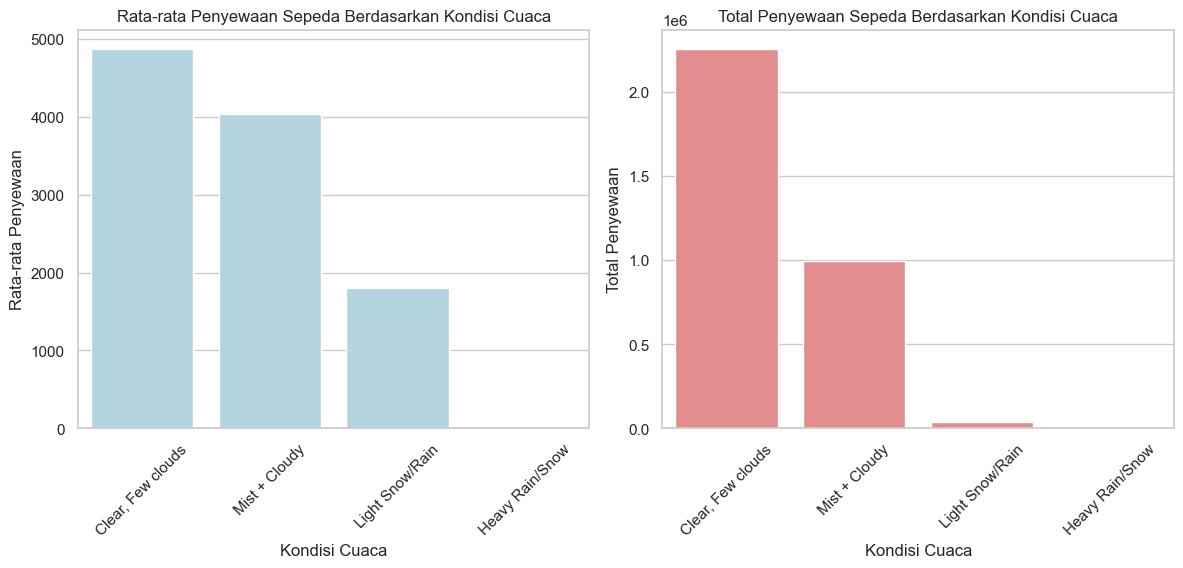

In [25]:
data = {
    'weathersit': ['Clear, Few clouds', 'Mist + Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'],
    'mean': [4876.79, 4035.86, 1803.29, 0],  
    'sum': [2257952, 996858, 37869, 0]       
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='weathersit', y='mean', data=df, color='lightblue')  
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='weathersit', y='sum', data=df, color='lightcoral') 
plt.title('Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insight:**
- Dari visualisasi ini, terlihat jelas bahwa terdapat kenaikan signifikan dalam penyewaan sepeda saat cuaca cerah dibandingkan dengan kondisi berkabut dan hujan. Sebaliknya, terjadi penurunan tajam dalam jumlah penyewaan sepeda saat cuaca buruk, seperti hujan atau salju.

### Pertanyaan 2:

C:\Users\memet\AppData\Local\Temp\ipykernel_13200\1599698964.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='mean', data=df, palette='Blues')
C:\Users\memet\AppData\Local\Temp\ipykernel_13200\1599698964.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='sum', data=df, palette='Oranges')


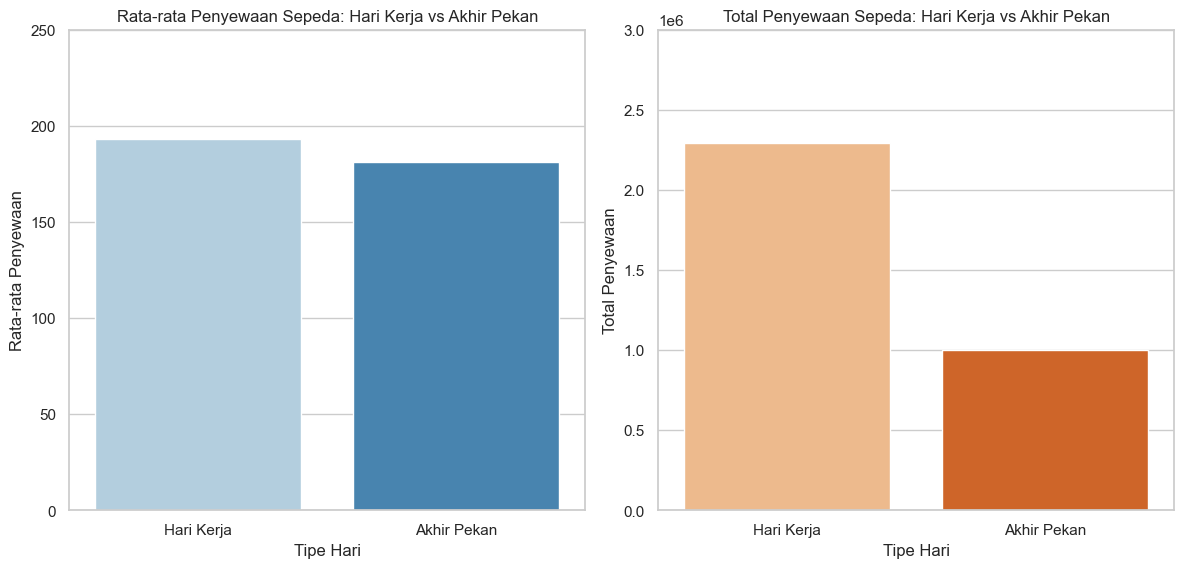

In [21]:
data = {
    'workingday': ['Hari Kerja', 'Akhir Pekan'],
    'mean': [193, 181],         
    'sum': [2292410, 1000269]   
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='workingday', y='mean', data=df, palette='Blues')
plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.ylim(0, 250)  

plt.subplot(1, 2, 2)
sns.barplot(x='workingday', y='sum', data=df, palette='Oranges')
plt.title('Total Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Total Penyewaan')
plt.ylim(0, 3000000)  

plt.tight_layout()
plt.show()


**Insight:**
- Dari visualisasi ini, terlihat bahwa rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Selain itu, total penyewaan sepeda juga lebih besar pada hari kerja, meskipun jumlah penyewaan pada akhir pekan tetap cukup signifikan.

## Analisis Lanjutan (Opsional)

In [22]:
day_mapping = {
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 
    4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
}

data_day['day_name'] = data_day['weekday'].map(day_mapping)

weekday_grouping = data_day.groupby('day_name').agg(mean=('cnt', 'mean'), sum=('cnt', 'sum')).reset_index()

print(weekday_grouping)


  day_name         mean     sum
0    Jumat  4690.288462  487790
1    Kamis  4667.259615  485395
2   Minggu  4228.828571  444027
3     Rabu  4548.538462  473048
4    Sabtu  4550.542857  477807
5   Selasa  4510.663462  469109
6    Senin  4338.123810  455503


Berdasarkan hasil analisis, rata-rata penyewaan sepeda tertinggi terjadi pada hari Jumat, dengan rata-rata penyewaan sebanyak 4,690 sepeda dan total penyewaan mencapai 487,790 sepeda. Diikuti oleh hari Kamis dengan rata-rata penyewaan sebesar 4,667 sepeda dan total penyewaan 485,395 sepeda. Hari Minggu juga menunjukkan angka yang signifikan, dengan rata-rata penyewaan 4,229 sepeda dan total penyewaan 444,027 sepeda. 

Sementara itu, hari Rabu, Sabtu, dan Selasa mencatatkan rata-rata penyewaan yang hampir serupa, berkisar antara 4,550 hingga 4,590 sepeda. Terakhir, hari Senin menunjukkan rata-rata penyewaan terendah di antara semua hari, yaitu 4,338 sepeda dengan total penyewaan sebesar 455,503 sepeda.

Insight ini menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi di pertengahan hingga akhir pekan, dengan hari Jumat sebagai hari dengan penyewaan tertinggi. Sebaliknya, hari Senin menjadi hari dengan penyewaan terendah, yang mungkin dipengaruhi oleh faktor-faktor seperti cuaca, kebiasaan masyarakat, atau kegiatan yang berbeda pada hari-hari tersebut.

C:\Users\memet\AppData\Local\Temp\ipykernel_13200\3775964030.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(days, rotation=45)
C:\Users\memet\AppData\Local\Temp\ipykernel_13200\3775964030.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(days, rotation=45)


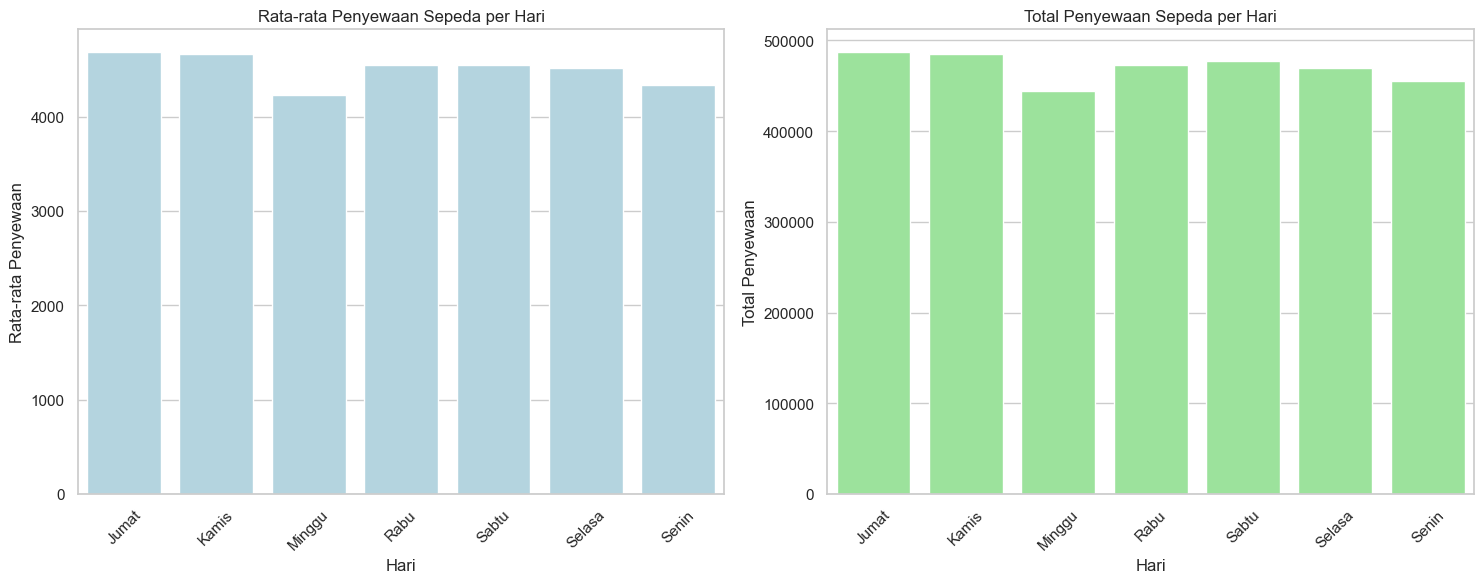

In [23]:
sns.set(style="whitegrid")

days = weekday_grouping['day_name']
mean_rentals = weekday_grouping['mean']
sum_rentals = weekday_grouping['sum']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.barplot(x=days, y=mean_rentals, ax=axes[0], color='lightblue') 
axes[0].set_title('Rata-rata Penyewaan Sepeda per Hari')
axes[0].set_xlabel('Hari')
axes[0].set_ylabel('Rata-rata Penyewaan')
axes[0].set_xticklabels(days, rotation=45)

sns.barplot(x=days, y=sum_rentals, ax=axes[1], color='lightgreen')  
axes[1].set_title('Total Penyewaan Sepeda per Hari')
axes[1].set_xlabel('Hari')
axes[1].set_ylabel('Total Penyewaan')
axes[1].set_xticklabels(days, rotation=45)

plt.tight_layout()
plt.show()


## Conclusion

- ### Konklusi Analisis Penyewaan Sepeda

- **Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?**
1. **Cuaca Cerah**: Penyewaan sepeda paling tinggi terjadi pada cuaca cerah atau berawan ringan, dengan rata-rata penyewaan mencapai 4,876 sepeda per hari. Hal ini menunjukkan bahwa kondisi cuaca yang baik mendorong pengguna untuk menyewa sepeda.
2. **Cuaca Berkabut dan Mendung**: Penyewaan menurun ketika cuaca berkabut atau mendung, dengan rata-rata 4,035 sepeda per hari. Meskipun masih ada penyewaan, terlihat jelas bahwa cuaca yang tidak cerah mempengaruhi keputusan pengguna.
3. **Cuaca Buruk**: Pada cuaca hujan ringan atau salju, rata-rata penyewaan turun drastis menjadi 1,803 sepeda. Ini menunjukkan bahwa kondisi cuaca yang buruk memiliki dampak negatif yang signifikan terhadap minat penyewaan sepeda.
4. **Kesimpulan**: Secara keseluruhan, cuaca cerah berperan besar dalam meningkatkan jumlah penyewaan sepeda, sedangkan cuaca buruk sangat menghambat penyewaan.

- **Pertanyaan 2: Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan/hari libur?**
1. **Hari Kerja**: Rata-rata penyewaan sepeda pada hari kerja mencapai 193 sepeda per hari, menunjukkan bahwa hari kerja menarik lebih banyak pengguna sepeda.
2. **Akhir Pekan**: Pada akhir pekan, rata-rata penyewaan sedikit lebih rendah, yaitu 181 sepeda per hari. Meskipun ada perbedaan yang kecil, penyewaan pada akhir pekan tetap cukup signifikan.
3. **Kesimpulan**: Meskipun terdapat lebih banyak penyewaan pada hari kerja dibandingkan akhir pekan, perilaku penyewaan pada akhir pekan tetap menunjukkan minat yang baik. Hal ini menunjukkan bahwa pengguna sepeda tidak hanya terfokus pada hari kerja tetapi juga aktif pada akhir pekan.

- ### Tindakan Lanjutan
1. **Promosi Cuaca Buruk**: Untuk menarik lebih banyak penyewa pada hari berkabut atau hujan, perusahaan dapat menawarkan diskon atau promosi khusus.
2. **Optimalisasi Hari Cerah**: Pada hari cerah, perusahaan bisa menambah jumlah sepeda yang tersedia atau mengadakan acara untuk memaksimalkan potensi penyewaan.
3. **Fasilitas Akhir Pekan**: Perusahaan dapat meningkatkan jumlah sepeda yang tersedia pada akhir pekan dan menyediakan promosi tambahan untuk meningkatkan penyewaan pada hari tersebut.